In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
titanic_df = pd.read_csv('titanic_data/train.csv')

In [183]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
titanic_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: >

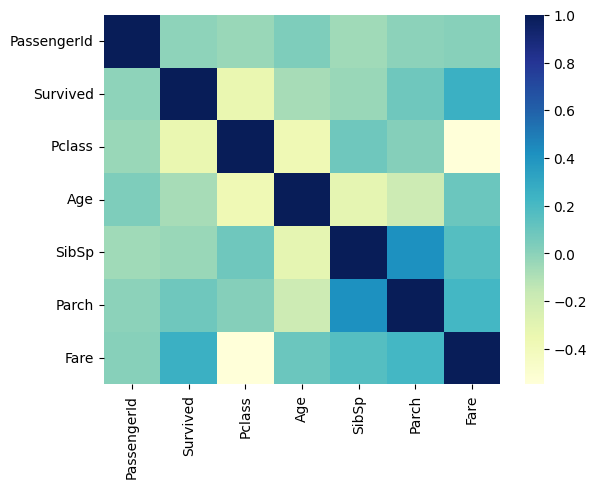

In [186]:
import seaborn as sns

sns.heatmap(titanic_df.corr(numeric_only=True), cmap='YlGnBu')

In [187]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_df, titanic_df[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_df.loc[train_indices]
    strat_test_set = titanic_df.loc[test_indices]

In [188]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S


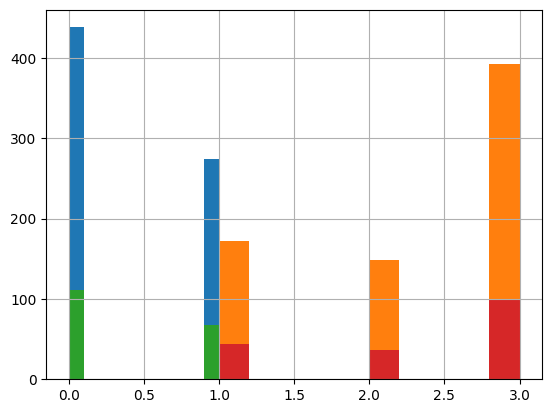

In [189]:
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()


In [190]:
type(strat_train_set)

pandas.core.frame.DataFrame

In [191]:
from utilities.titanicMW import AgeImputer, FeatureEncoder, FeatureDropper

In [192]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('ageimputer', AgeImputer()), 
                     ('featureencoder', FeatureEncoder()), 
                     ('featuredropper', FeatureDropper())])


TESTTT


In [193]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [194]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked_C   712 non-null    float64
 8   Embarked_Q   712 non-null    float64
 9   Embarked_S   712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 66.9 KB


In [195]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Female,Male
0,123,0,2,32.500000,1,0,30.0708,1.0,0.0,0.0,0.0,1.0
1,37,1,3,29.832052,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
2,609,1,2,22.000000,1,2,41.5792,1.0,0.0,0.0,1.0,0.0
3,774,0,3,29.832052,0,0,7.2250,1.0,0.0,0.0,0.0,1.0
4,879,0,3,29.832052,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,214,0,2,30.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
708,435,0,1,50.000000,1,0,55.9000,0.0,0.0,1.0,0.0,1.0
709,339,1,3,45.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
710,632,0,3,51.000000,0,0,7.0542,0.0,0.0,1.0,0.0,1.0


In [196]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()


In [197]:
X_data

array([[-1.22230957e+00, -3.70196244e-01,  2.04766594e-01, ...,
        -1.68165305e+00, -7.35612358e-01,  7.35612358e-01],
       [-1.55743151e+00,  8.27893418e-01, -5.45345713e-16, ...,
        -1.68165305e+00, -7.35612358e-01,  7.35612358e-01],
       [ 6.71519094e-01, -3.70196244e-01, -6.01114559e-01, ...,
        -1.68165305e+00,  1.35941164e+00, -1.35941164e+00],
       ...,
       [-3.80607939e-01,  8.27893418e-01,  1.16414892e+00, ...,
         5.94652981e-01, -7.35612358e-01,  7.35612358e-01],
       [ 7.61144730e-01,  8.27893418e-01,  1.62465243e+00, ...,
         5.94652981e-01, -7.35612358e-01,  7.35612358e-01],
       [ 4.80364075e-02,  8.27893418e-01, -1.90587452e+00, ...,
        -1.68165305e+00,  1.35941164e+00, -1.35941164e+00]])

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

params = [
    {'n_estimators' : [10, 20, 50, 100, 200],
     'max_depth' : [None, 2, 5, 10, 20],
     'min_samples_split' : [2,3,4,5]}
]

grid_search = GridSearchCV(clf, params, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 2, 5, 10, 20],
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [10, 20, 50, 100, 200]}],
             return_train_score=True, scoring='accuracy')

In [199]:
final_clf = grid_search.best_estimator_

In [200]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=20)

In [201]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [202]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_test_data = scaler.fit_transform(X_test)
y_test_data = y_test.to_numpy()

In [203]:
final_clf.score(X_test_data, y_test_data)

0.7932960893854749

In [204]:
final_data = pipeline.fit_transform(titanic_df)

In [205]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


<Axes: >

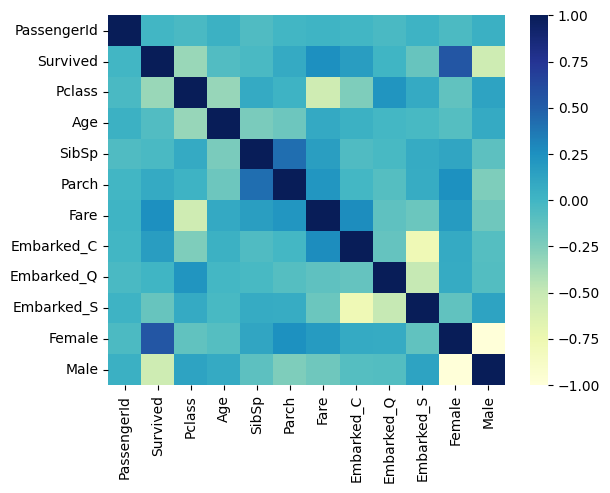

In [222]:
sns.heatmap(final_data.corr(numeric_only=True), cmap='YlGnBu')

In [206]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_final_data = scaler.fit_transform(X_final)
y_final_data = y_final.to_numpy()


In [207]:
final_clf.score(X_final_data, y_final_data)

0.8406285072951739

In [208]:
titanic_test_data = pd.read_csv('titanic_data/test.csv')

In [209]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [210]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [211]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Embarked_C   418 non-null    float64
 7   Embarked_Q   418 non-null    float64
 8   Embarked_S   418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [212]:
final_test_data = final_test_data.fillna(method='ffill')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6328\2567040033.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_test_data = final_test_data.fillna(method='ffill')


In [213]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [214]:
scaler = StandardScaler()
X_final_data = scaler.fit_transform(final_test_data)
X_final_data[0]


array([-1.72791209,  0.87348191,  0.3349926 , -0.49947002, -0.4002477 ,
       -0.49707093, -0.56814154,  2.84375747, -1.35067551, -0.75592895,
        0.75592895])

In [217]:
predictions = final_clf.predict(X_final_data)

In [218]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [219]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [220]:
final_df.to_csv('titanic_data/predictions.csv', index=False)

In [221]:
import joblib


joblib.dump(final_clf, 'model.pkl')

joblib.dump(pipeline, 'pipeline.pkl')

joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']